### Task 1 interactive TicTacToe game 

In [2]:
import random

class TicTacToe:
    def __init__(self):
        # Initialize empty 3x3 board
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.current_player = 'X'  # X always starts
    
    def print_board(self):
        """Print the current state of the board"""
        print('  0 1 2')
        for i, row in enumerate(self.board):
            print(f"{i} {' '.join(row)}")
        print()
    
    def make_move(self, position):
        """Make a move at the given position (row, col)"""
        row, col = position
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            return True
        return False
    
    def is_valid_move(self, row, col):
        """Check if a move is valid"""
        # Check if position is within bounds and cell is empty
        return 0 <= row < 3 and 0 <= col < 3 and self.board[row][col] == ' '
    
    def check_winner(self):
        """Check if there's a winner"""
        # Check rows
        for row in self.board:
            if row[0] == row[1] == row[2] != ' ':
                return row[0]
        
        # Check columns
        for col in range(3):
            if self.board[0][col] == self.board[1][col] == self.board[2][col] != ' ':
                return self.board[0][col]
        
        # Check diagonals
        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            return self.board[0][0]
        if self.board[0][2] == self.board[1][1] == self.board[2][0] != ' ':
            return self.board[0][2]
        
        return None
    
    def is_board_full(self):
        """Check if the board is full (tie)"""
        for row in self.board:
            if ' ' in row:
                return False
        return True
    
    def switch_player(self):
        """Switch the current player"""
        self.current_player = 'O' if self.current_player == 'X' else 'X'
    
    def get_available_moves(self):
        """Return a list of available moves as (row, col) tuples"""
        moves = []
        for i in range(3):
            for j in range(3):
                if self.board[i][j] == ' ':
                    moves.append((i, j))
        return moves

class SimpleAI:
    def __init__(self, player_symbol):
        self.symbol = player_symbol
    
    def make_move(self, game):
        """Make a move based on simple strategy"""
        available_moves = game.get_available_moves()
        
        # Try to win if possible
        for move in available_moves:
            row, col = move
            game.board[row][col] = self.symbol
            if game.check_winner() == self.symbol:
                game.board[row][col] = ' '  # Reset for actual move
                return move
            game.board[row][col] = ' '  # Reset
        
        # Block opponent if they're about to win
        opponent = 'O' if self.symbol == 'X' else 'X'
        for move in available_moves:
            row, col = move
            game.board[row][col] = opponent
            if game.check_winner() == opponent:
                game.board[row][col] = ' '  # Reset for actual move
                return move
            game.board[row][col] = ' '  # Reset
        
        # Take center if available
        if (1, 1) in available_moves:
            return (1, 1)
        
        # Take a corner if available
        corners = [(0, 0), (0, 2), (2, 0), (2, 2)]
        available_corners = [move for move in corners if move in available_moves]
        if available_corners:
            return random.choice(available_corners)
        
        # Take any available move
        return random.choice(available_moves)

def play_game():
    game = TicTacToe()
    ai = SimpleAI('O')
    
    print("Welcome to Tic-Tac-Toe!")
    print("You are X, the AI is O.")
    print("Enter your move as row column (e.g., '1 2')")
    
    while True:
        game.print_board()
        
        if game.current_player == 'X':
            # Human player's turn
            try:
                row, col = map(int, input("Your move (row col): ").split())
                if not game.make_move((row, col)):  # Note: passing a tuple as a single argument
                    print("Invalid move! Try again.")
                    continue
            except ValueError:
                print("Please enter two numbers separated by a space.")
                continue
        else:
            # AI's turn
            print("AI is thinking...")
            move = ai.make_move(game)
            print(f"AI moves to: {move}")
            game.make_move(move)  # Note: passing a tuple as a single argument
        
        # Check for game end
        winner = game.check_winner()
        if winner:
            game.print_board()
            if winner == 'X':
                print("Congratulations! You win!")
            else:
                print("AI wins! Better luck next time.")
            break
        
        if game.is_board_full():
            game.print_board()
            print("It's a tie!")
            break
        
        game.switch_player()

# Start the game
if __name__ == "__main__":
    play_game()

Welcome to Tic-Tac-Toe!
You are X, the AI is O.
Enter your move as row column (e.g., '1 2')
  0 1 2
0      
1      
2      



Your move (row col):  1 2


  0 1 2
0      
1     X
2      

AI is thinking...
AI moves to: (1, 1)
  0 1 2
0      
1   O X
2      



Your move (row col):  1 1


Invalid move! Try again.
  0 1 2
0      
1   O X
2      



Your move (row col):  2 1


  0 1 2
0      
1   O X
2   X  

AI is thinking...
AI moves to: (0, 0)
  0 1 2
0 O    
1   O X
2   X  



Your move (row col):  2 2


  0 1 2
0 O    
1   O X
2   X X

AI is thinking...
AI moves to: (0, 2)
  0 1 2
0 O   O
1   O X
2   X X



Your move (row col):  2 0


  0 1 2
0 O   O
1   O X
2 X X X

Congratulations! You win!


### Task 2

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv('company_sales_data.csv')
data


,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [17]:
months = data['month_number']
profit = data['total_profit']
soap_sales = data['bathingsoap']
facewash_sales = data['facewash']

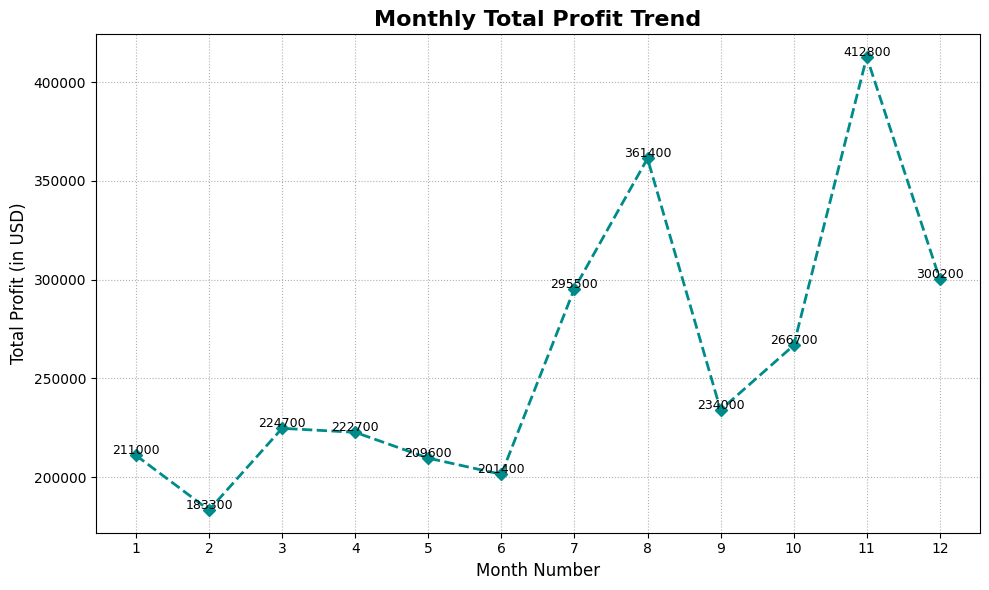

In [15]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(months, profit, color='darkcyan', marker='D', linestyle='--', linewidth=2, markersize=6)

# Add titles and labels
plt.title('Monthly Total Profit Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month Number', fontsize=12)
plt.ylabel('Total Profit (in USD)', fontsize=12)
plt.xticks(months)
plt.grid(True, linestyle=':', linewidth=0.8)

# Optional: Add data labels on each point
for i, profit in enumerate(profit):
    plt.text(months[i], profit + 500, f'{profit}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

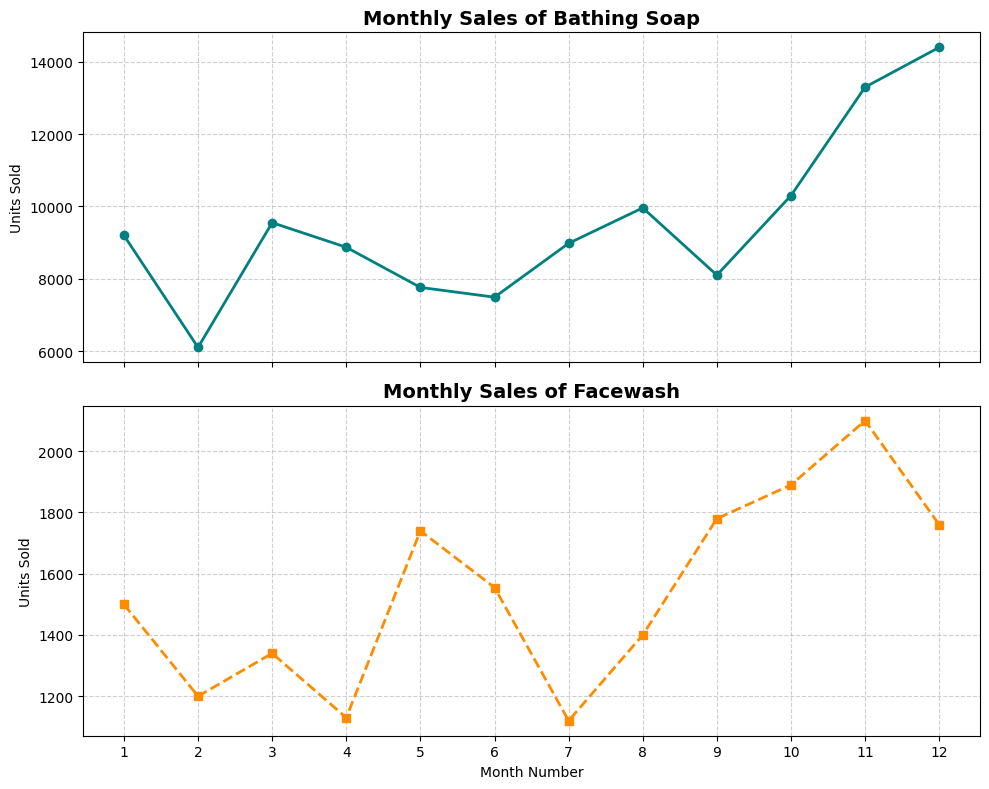

In [19]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Bathing Soap subplot
axs[0].plot(months, soap_sales, color='teal', marker='o', linestyle='-', linewidth=2)
axs[0].set_title('Monthly Sales of Bathing Soap', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Units Sold')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Facewash subplot
axs[1].plot(months, facewash_sales, color='darkorange', marker='s', linestyle='--', linewidth=2)
axs[1].set_title('Monthly Sales of Facewash', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Month Number')
axs[1].set_ylabel('Units Sold')
axs[1].grid(True, linestyle='--', alpha=0.6)

# Final layout adjustments
plt.xticks(months)
plt.tight_layout()
plt.show()
